In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


DATA COLLECTION

In [3]:
df = pd.read_csv('user_input_ride_demand.csv')

In [4]:
df.head

<bound method NDFrame.head of        hour  is_raining  traffic_level  surge_multiplier  num_ride_requests
0        20           1              0               2.0                 63
1         8           1              0               1.2                150
2         6           0              2               1.0                 80
3         8           0              1               1.2                110
4         9           0              1               1.0                123
...     ...         ...            ...               ...                ...
19995    14           0              2               1.0                 79
19996     6           0              1               1.2                 72
19997    15           0              1               1.0                 86
19998    11           1              1               1.0                111
19999    18           0              1               1.0                133

[20000 rows x 5 columns]>

In [5]:
df.isnull().sum()

hour                 0
is_raining           0
traffic_level        0
surge_multiplier     0
num_ride_requests    0
dtype: int64

In [6]:
df.describe()

,hour,is_raining,traffic_level,surge_multiplier,num_ride_requests
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,11.452350,0.202400,0.892600,1.222230,91.358050
std,6.904862,0.401799,0.699778,0.308755,28.017327
min,0.000000,0.000000,0.000000,1.000000,36.000000
25%,5.000000,0.000000,0.000000,1.000000,73.000000
50%,11.000000,0.000000,1.000000,1.000000,88.000000
75%,17.000000,0.000000,1.000000,1.200000,105.000000
max,23.000000,1.000000,2.000000,2.000000,197.000000


DATA PREPROCESSING

In [7]:
df.columns

Index(['hour', 'is_raining', 'traffic_level', 'surge_multiplier',
       'num_ride_requests'],
      dtype='object')

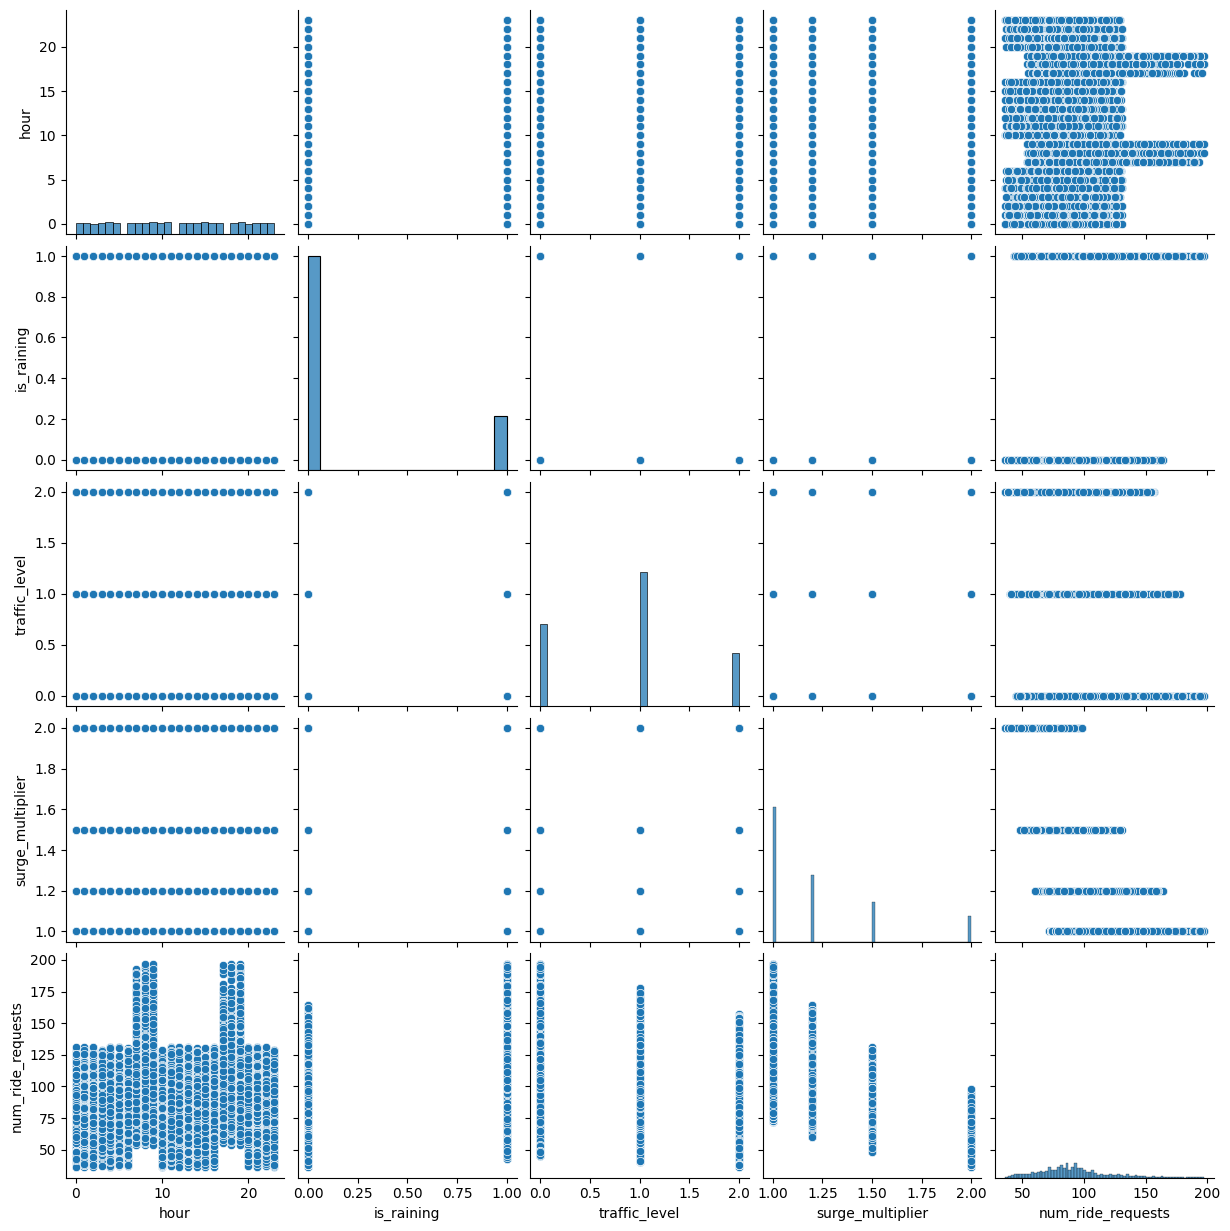

In [8]:
sns.pairplot(df)
plt.show()


In [9]:
df.columns

Index(['hour', 'is_raining', 'traffic_level', 'surge_multiplier',
       'num_ride_requests'],
      dtype='object')

In [10]:
x = df[['hour', 'is_raining', 'traffic_level', 'surge_multiplier']]
y = df['num_ride_requests']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

MODEL BUILDING USING TENSORFLOW AND KERAS

In [13]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)
])


c:\Users\avinash\Downloads\my projects\Deep learning\tf-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [15]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1)


Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 4761.6870 - mae: 55.9928 - val_loss: 418.4218 - val_mae: 16.2948
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 396.0927 - mae: 15.7796 - val_loss: 349.2046 - val_mae: 15.3167
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 345.7203 - mae: 14.9696 - val_loss: 314.2441 - val_mae: 14.3038
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 315.1635 - mae: 14.2688 - val_loss: 307.9031 - val_mae: 13.8630
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 313.7384 - mae: 14.3089 - val_loss: 304.2258 - val_mae: 14.7733
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 305.8855 - mae: 14.1508 - val_loss: 289.5982 - val_mae: 13.5183
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 296.0415 - mae: 13.8554 - val_loss: 279.5611 - val_mae: 13.3441
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 280.6174 - mae: 13.3384 - val_loss: 270.9185 - val_mae: 13.6510

MODEL EVALUATION

In [16]:
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f"Test Mean Absolute Error: {mae:.2f}")


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 43.2266 - mae: 5.2419
Test Mean Absolute Error: 5.11


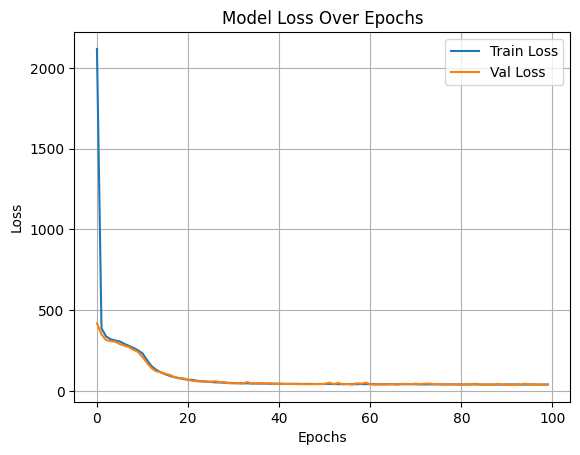

In [17]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


PREDICTION

In [18]:
y_pred = model.predict(X_test_scaled)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [19]:
y_pred

array([[ 59.839447],
       [ 98.23125 ],
       [ 99.25203 ],
       ...,
       [ 90.48927 ],
       [100.04339 ],
       [145.62117 ]], dtype=float32)

In [20]:
df1 = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred.flatten()})

In [21]:
df1

,Actual,Predicted
0,56,59.839447
1,90,98.231247
2,106,99.252029
3,114,109.253998
4,104,100.078674
...,...,...
3995,102,105.296677
3996,80,75.101715
3997,86,90.489273
3998,100,100.043388


<Axes: >

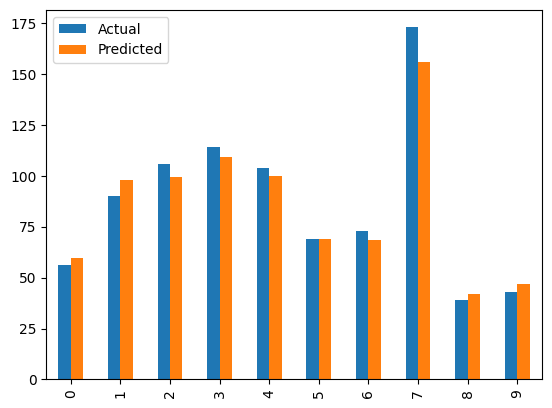

In [22]:
graph = df1.head(10)
graph.plot(kind='bar')

C:\Users\avinash\AppData\Local\Temp\ipykernel_17700\775683247.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


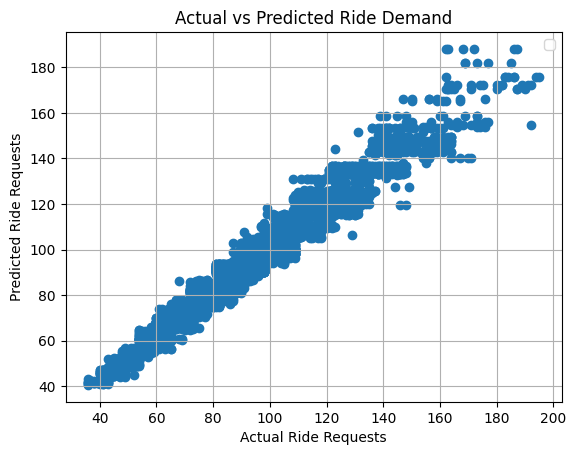

In [23]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Ride Requests")
plt.ylabel("Predicted Ride Requests")
plt.title("Actual vs Predicted Ride Demand")
plt.grid(True)
plt.legend()
plt.show()

In [24]:
df.columns

Index(['hour', 'is_raining', 'traffic_level', 'surge_multiplier',
       'num_ride_requests'],
      dtype='object')

In [30]:
features = ['hour', 'is_raining', 'traffic_level', 'surge_multiplier']
user = []
for i in features:
    value = float(input(f"enter feature {i}"))
    user.append(value)
user2 = np.array(user).reshape(1, -1)
user_scaled = scaler.transform(user2)
prediction = model.predict(user_scaled)
print(f"Predicted ride demand: {prediction[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted ride demand: 68.08


c:\Users\avinash\Downloads\my projects\Deep learning\tf-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [25]:
df.head(10)

,hour,is_raining,traffic_level,surge_multiplier,num_ride_requests
0,20,1,0,2.0,63
1,8,1,0,1.2,150
2,6,0,2,1.0,80
3,8,0,1,1.2,110
4,9,0,1,1.0,123
5,20,0,0,2.0,52
6,2,0,0,1.0,104
7,17,0,1,1.2,117
8,8,0,1,1.0,148
9,4,0,0,1.5,71


ADDING CASUAL INTERFERENCE USING DOWHY LIBRARY

In [33]:
!pip install dowhy

  Using cached dowhy-0.12-py3-none-any.whl.metadata (18 kB)
  Using cached causal_learn-0.1.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached cvxpy-1.6.5-cp312-cp312-win_amd64.whl.metadata (9.5 kB)
  Using cached Cython-0.29.37-py2.py3-none-any.whl.metadata (3.1 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached numba-0.61.2-cp312-cp312-win_amd64.whl.metadata (2.9 kB)
  Using cached statsmodels-0.14.4-cp312-cp312-win_amd64.whl.metadata (9.5 kB)
  Using cached sympy-1.13.3-py3-none-any.whl.metadata (12 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
  Using cached pydot-3.0.4-py3-none-any.whl.metadata (10 kB)
  Using cached momentchi2-0.1.8-py3-none-any.whl.metadata (6.1 kB)
  Using cached osqp-1.0.3-cp312-cp312-win_amd64.whl.metadata (2.1 kB)
  Using cached clarabel-0.10.0-cp39-abi3-win_amd64.whl.metadata (4.8 kB)
  Using cached scs-3.2.7.post2-cp312-cp312-win_amd64.wh


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\avinash\Downloads\my projects\Deep learning\tf-env\Lib\site-packages\dowhy\causal_model.py:583: UserWarning: 1 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
  warnings.warn(


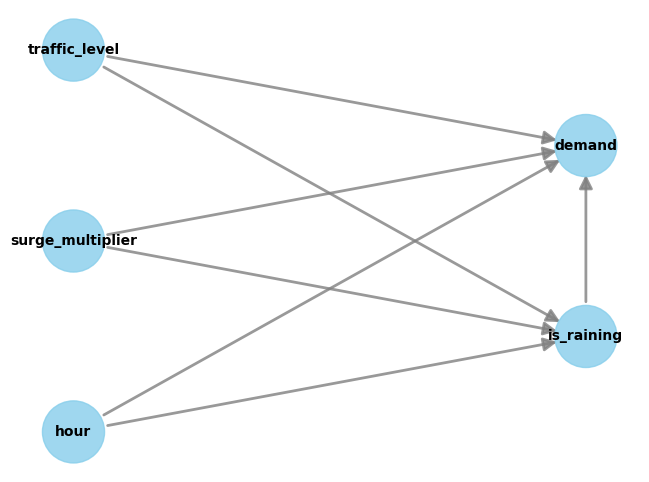

In [34]:
import dowhy
from dowhy import CausalModel

# Assuming 'df' is your full DataFrame
model = CausalModel(
    data=df,
    treatment='is_raining',
    outcome='demand',
    common_causes=['hour', 'traffic_level', 'surge_multiplier'],
    instruments=None
)

model.view_model()  # Optional: visualizes DAG


c:\Users\avinash\Downloads\my projects\Deep learning\tf-env\Lib\site-packages\dowhy\causal_model.py:583: UserWarning: 2 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
  warnings.warn(


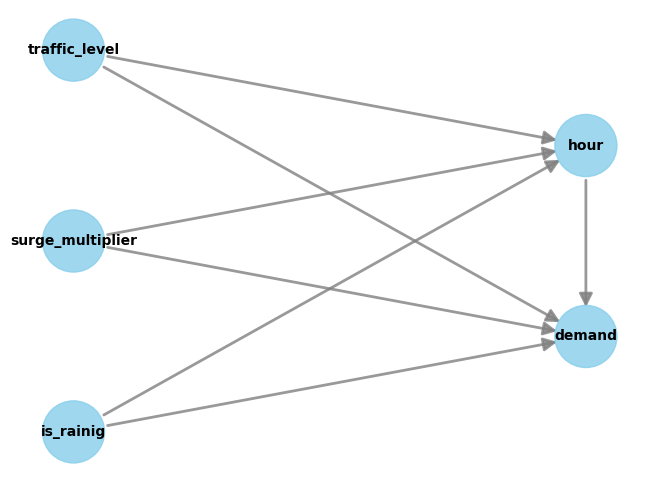

In [37]:
import dowhy
from dowhy import CausalModel

# Assuming 'df' is your full DataFrame
model = CausalModel(
    data=df,
    treatment='hour',
    outcome='demand',
    common_causes=['is_rainig', 'traffic_level', 'surge_multiplier'],
    instruments=None
)

model.view_model()  # Optional: visualizes DAG

c:\Users\avinash\Downloads\my projects\Deep learning\tf-env\Lib\site-packages\dowhy\causal_model.py:583: UserWarning: 1 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
  warnings.warn(


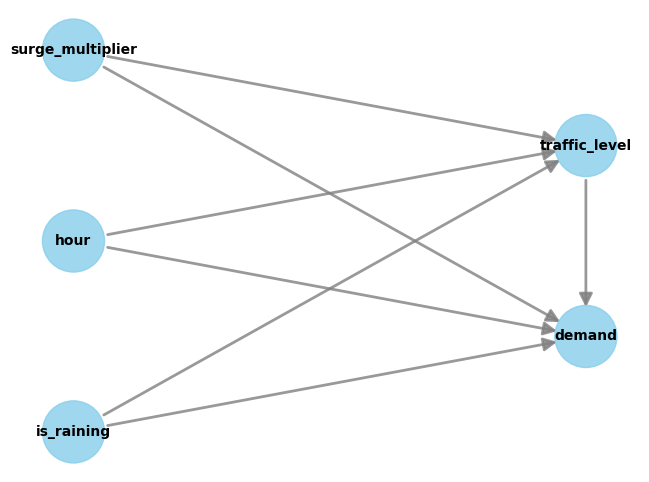

In [38]:
import dowhy
from dowhy import CausalModel

# Assuming 'df' is your full DataFrame
model = CausalModel(
    data=df,
    treatment='traffic_level',
    outcome='demand',
    common_causes=['hour', 'is_raining', 'surge_multiplier'],
    instruments=None
)

model.view_model()  # Optional: visualizes DAG

FINAL INTERFERENCE REPORT

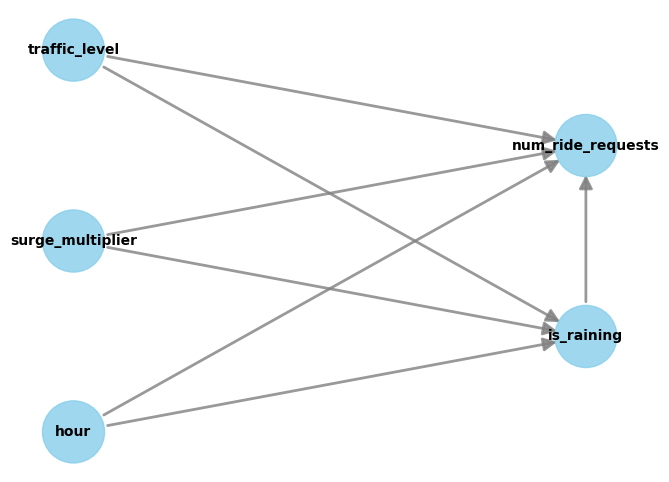

Causal Effect Estimate:
*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                
─────────────(E[num_ride_requests|hour,surge_multiplier,traffic_level])
d[is_raining]                                                          
Estimand assumption 1, Unconfoundedness: If U→{is_raining} and U→num_ride_requests then P(num_ride_requests|is_raining,hour,surge_multiplier,traffic_level,U) = P(num_ride_requests|is_raining,hour,surge_multiplier,traffic_level)

## Realized estimand
b: num_ride_requests~is_raining+hour+surge_multiplier+traffic_level
Target units: ate

## Estimate
Mean value: 16.49875


Refutation Result:
Refute: Use a Placebo Treatment
Estimated effect:16.49875
New effect:0.003109000000000008
p value:0.94



In [ ]:
import pandas as pd
from dowhy import CausalModel




model = CausalModel(
    data=df,
    treatment='is_raining',
    outcome='num_ride_requests',
    common_causes=['hour', 'traffic_level', 'surge_multiplier']
)


model.view_model()


identified_estimand = model.identify_effect()


causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.propensity_score_matching"
)

print("Causal Effect Estimate:")
print(causal_estimate)


refute = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="placebo_treatment_refuter"
)

print("\nRefutation Result:")
print(refute)


SAVING THE MODEL FOR STREAMLIT

In [31]:
import joblib

# Save model and scaler
joblib.dump(model, 'ride_demand_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']